# Wine quality model - from theory to technical application and results

## About Dataset

The following dataset consists of wine quality data. Predictor *Quality* was given by proffesional wine somelier. Every wine has also quantitive attributes based on a measurable quantities like its *alcohol content*, *pH*, etc.

This dataset can be modeled in two different ways:

1. We treat '*Quality*' as a discrete value that can only be a natural number in range 1 - 10 (like in original paper), then the modelling part becomes a classification task

2. We treat '*Quality*' as a continous value that can be any real number from 1 to 10. In this case the modelling part becomes a regression task.

This notebook contains exploratory data analysis. Code with Machine learning and classification models are in different files. 

## References

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
*Modeling wine preferences by data mining from physicochemical properties*, Elsevier, 47(4):547-553. ISSN: 0167-9236.

- doi: https://doi.org/10.1016/j.dss.2009.05.016
- dataset link: https://archive.ics.uci.edu/ml/datasets/wine+quality




In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

## Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


From *df.describe()* we see that every feature has different scales. For example 'chlorides' are bounded between 0.01 and 0.61 and 'total sulfur dioxid' ranges from 6 to 289. It's good idea to normalize them later.

### Correlation

Let's create a correlation matrix heatmap to explore the degree of correlation between different features. We are going to use built in pandas method *DataFrame.corr()* ; by default it returns Pearson correlation coefficient between different columns of a given dataframe. 

Pearson correlation coefficient of 2 independent features $X$ and $Y$ is defined as:

$$
 r_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}, 
$$

where $\operatorname{cov}(X,Y) $ is a covariance between $X$ and $Y$ and $\sigma$ stands for std. deviation of a given feature. Corr. coefficient is bounded by $-1 \le r_{X,Y} \le 1$, where $1$ represents maximum, positive linear correlation and $-1$ a maximum, negative linear correlation.


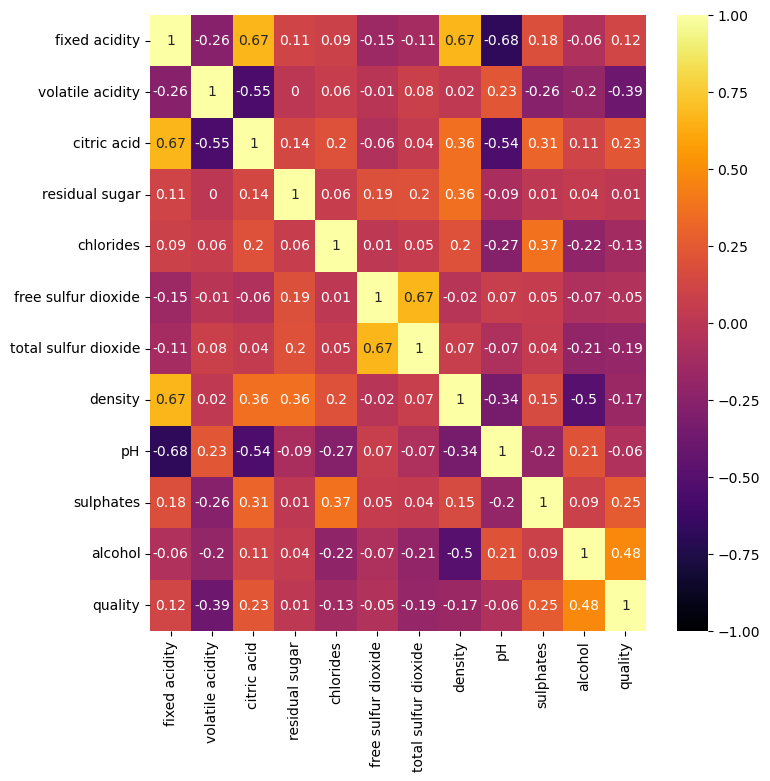

In [13]:
def correlation_plot(dataframe):
    plt.figure(figsize=(8, 8))
    sns.heatmap(dataframe.corr().round(2), annot = True, 
                vmin = -1, vmax = 1, cmap = 'inferno')
    plt.show()
    
    
correlation_plot(df)

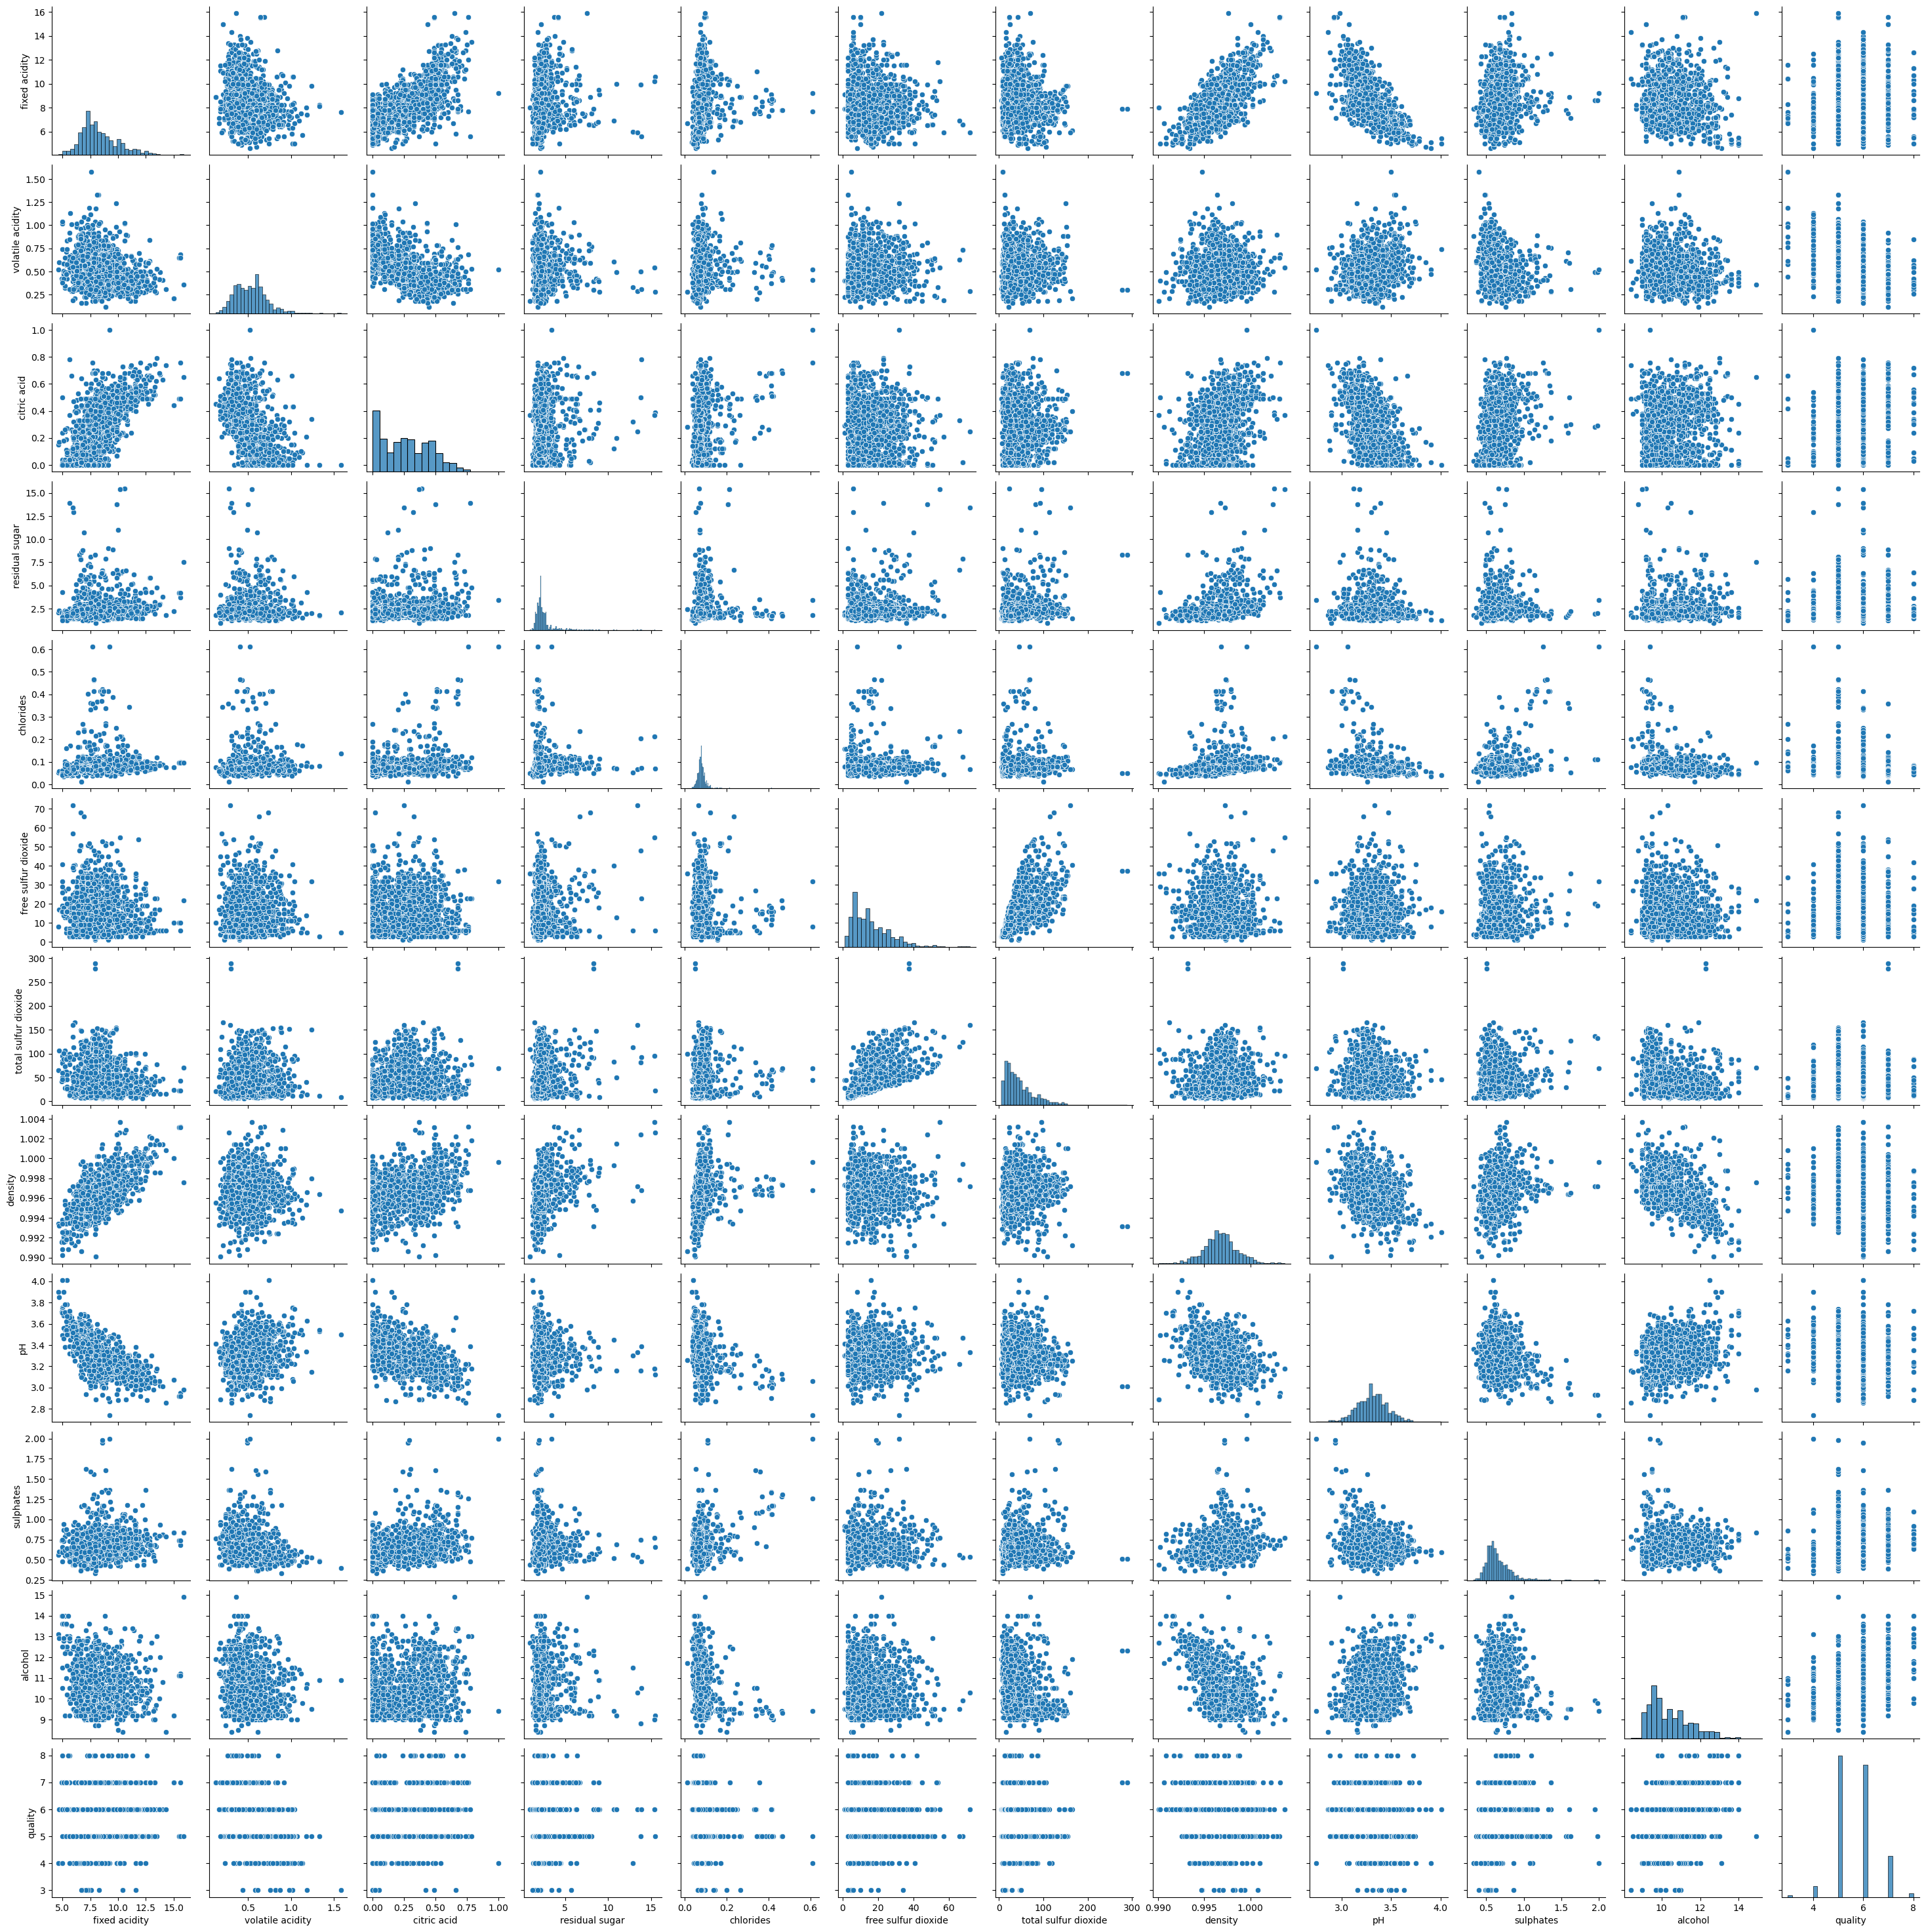

In [16]:
sns.pairplot(df)

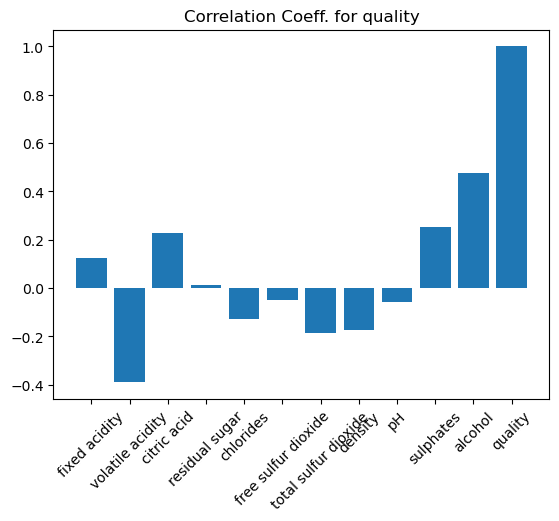

In [10]:
corr_list = df.corr()['quality']

plt.bar(df.columns, corr_list)
plt.title('Correlation Coeff. for quality')
plt.xticks(rotation = 45)
plt.show()

<Figure size 500x500 with 0 Axes>

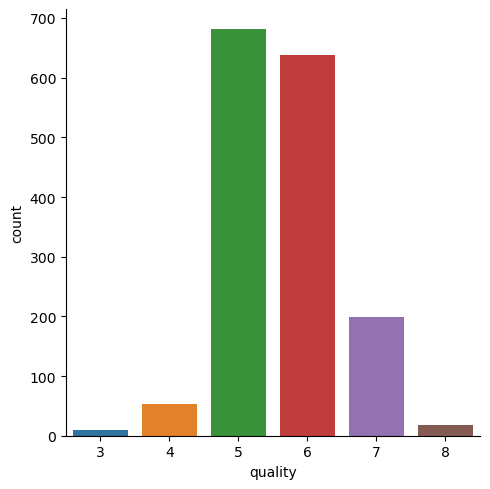

In [17]:
df_corr_quality = df.corr().round(2)
df_corr_quality = df_corr_quality.sort_values(by = 'quality')
plot = plt.figure(figsize = (5,5))
sns.catplot(data = df, x = 'quality', kind = 'count')

## Data with highest correlation to 'quality'

In [29]:
df_new = df[['volatile acidity', 'citric acid', 'free sulfur dioxide', 'sulphates', 'alcohol', 'quality']]

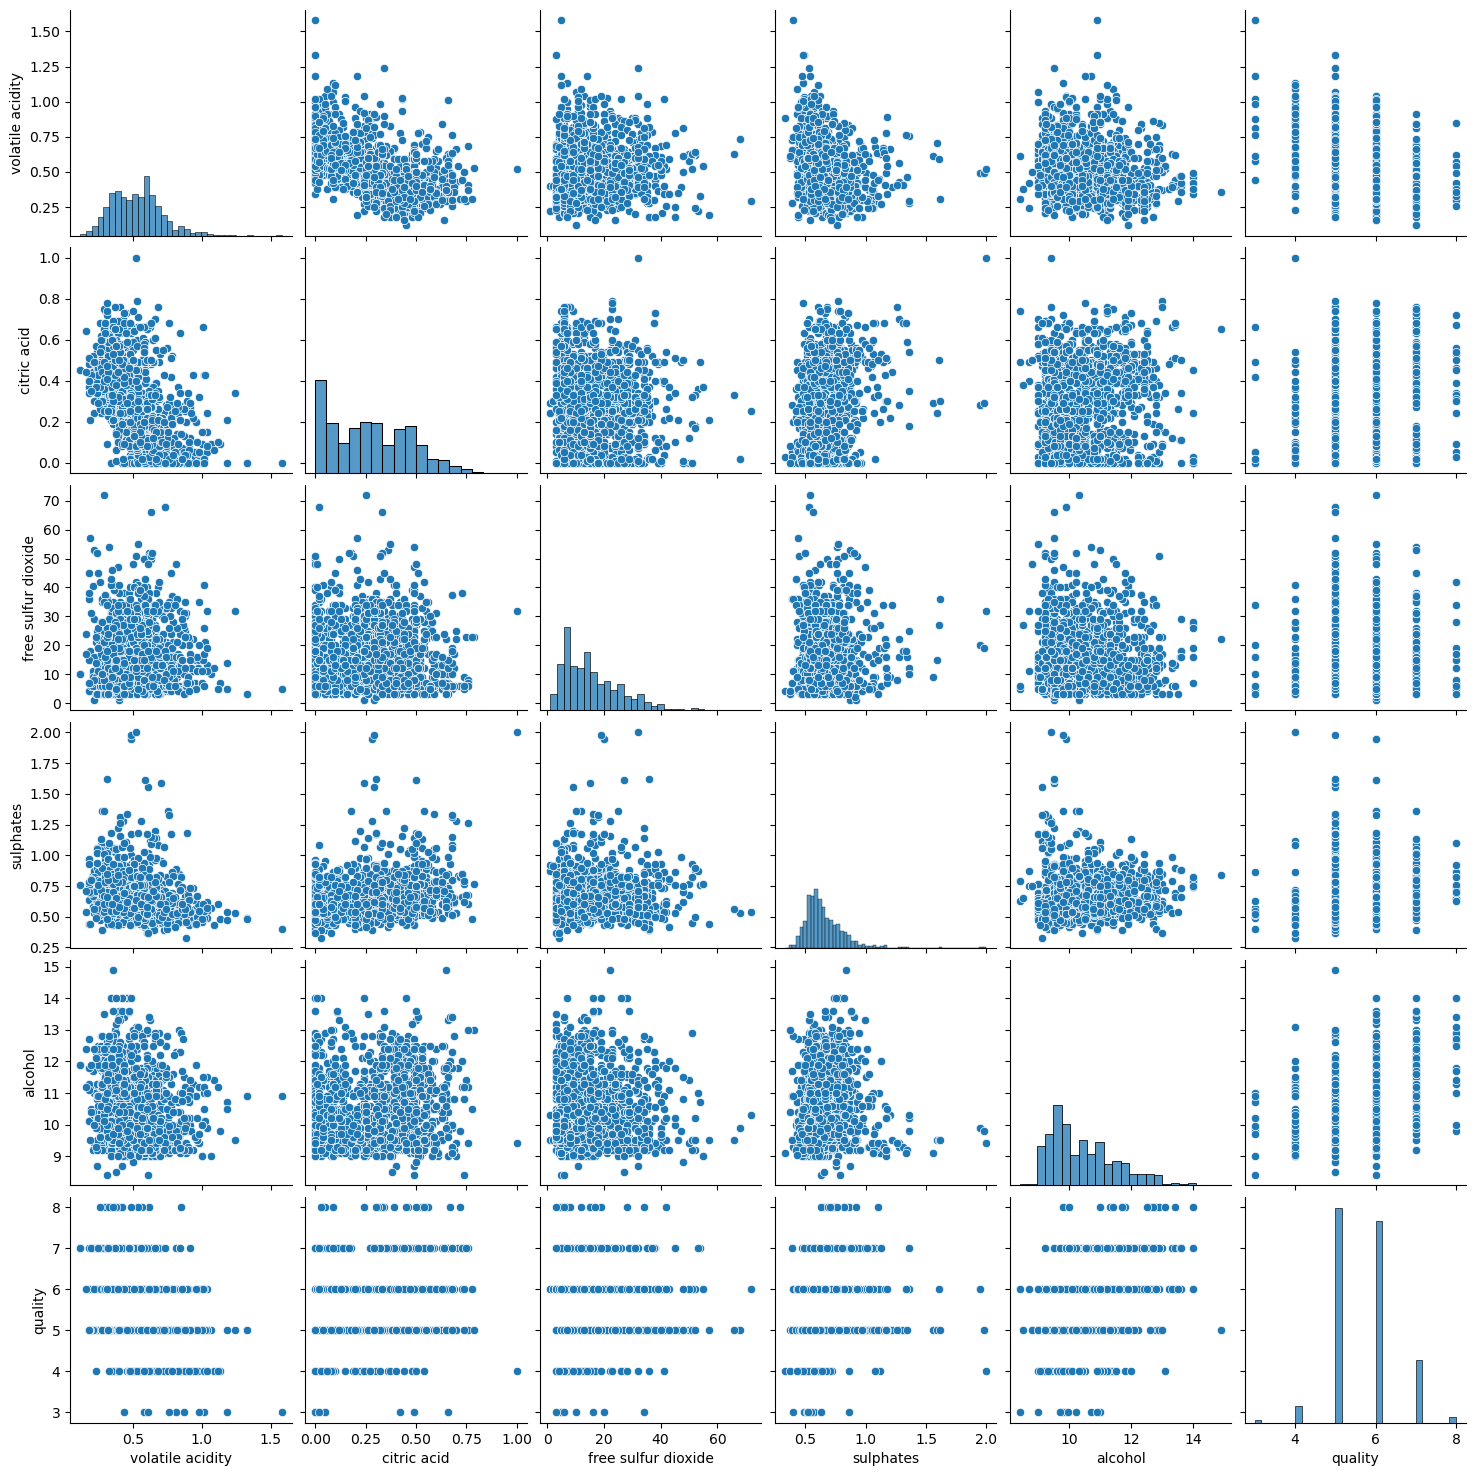

In [30]:
sns.pairplot(df_new)